### Autocorrelation function

In [1]:
import pandas as pd
import numpy as np
import efinance as ef
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = ef.stock.get_quote_history('600000')
# 假设df是你的DataFrame，'column_name'是列名
filtered_df = df[(df['日期'] > '2010-01-01') & (df['日期'] < '2025-01-01')]


In [4]:
s = filtered_df["涨跌幅"]
autocorr = s.autocorr(lag=1)  # lag表示滞后期数
print(f"滞后1阶的自相关系数: {autocorr:.4f}")

# 计算多阶自相关系数
for lag in range(1, 5):
    print(f"滞后{lag}阶的自相关系数: {s.autocorr(lag=lag):.4f}")

滞后1阶的自相关系数: -0.0162
滞后1阶的自相关系数: -0.0162
滞后2阶的自相关系数: 0.0303
滞后3阶的自相关系数: 0.0191
滞后4阶的自相关系数: -0.0304


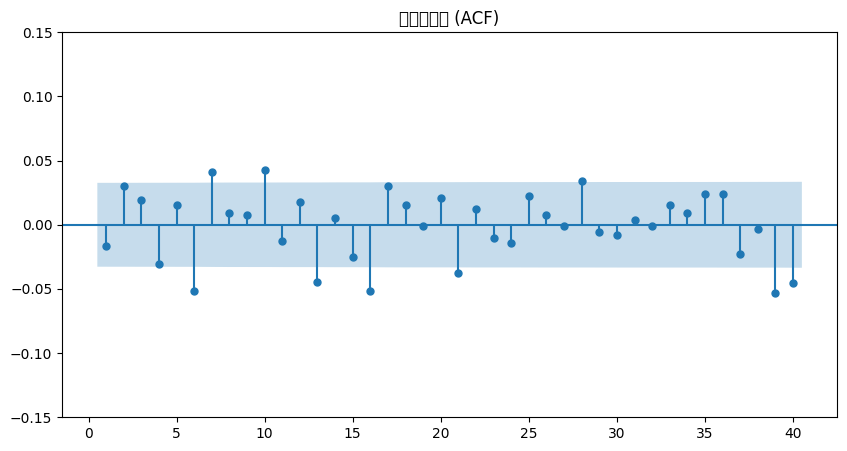

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(s, lags=40, zero=False, ax=ax)  # 将图形绘制到指定的ax上

ax.set_ylim(-0.15, 0.15)  # 设置y轴范围
ax.set_title('自相关函数 (ACF)')
plt.show()

## Test Individual ACF

### t-ratio test

In [8]:
t_ratio = s.autocorr(lag=1) / np.sqrt(1/len(s))
print(f"t_ratio: {t_ratio}")

# can't reject the H_o: rho_l = 0!

t_ratio: -0.972139133000819


### Portmanteau test

In [13]:
np.log(len(s)) #  Simulation studies suggest that the choice of m ≈ ln(T ) provides better power performance. 

np.float64(8.18757739559151)

In [14]:
m = 8
sum_ = 0
for i in range(1,m + 1):
    sum_ += (s.autocorr(lag=i) ** 2) / (len(s) - i)
q_m = len(s) * (len(s) + 2) * sum_
print(f"q statistics: {q_m}")

q statistics: 25.920858417635607


/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPytho

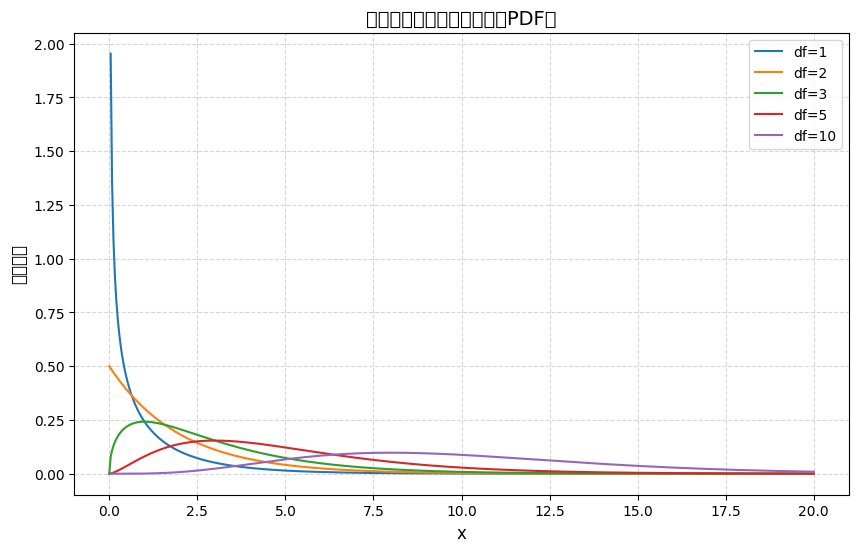

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 定义自由度列表（任意维度）
dfs = [1, 2, 3, 5, 10]  # 不同自由度的卡方分布
x = np.linspace(0, 20, 500)  # x轴范围

# 绘制PDF
plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')

plt.title("卡方分布的概率密度函数（PDF）", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("概率密度", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [11]:
# 计算95%分位数（右侧概率5%）
alpha = 0.05
for df in dfs:
    critical_value = chi2.ppf(1 - alpha, df)
    print(f"自由度 {df} 的95%分位数: {critical_value:.4f}")

自由度 1 的95%分位数: 3.8415
自由度 2 的95%分位数: 5.9915
自由度 3 的95%分位数: 7.8147
自由度 5 的95%分位数: 11.0705
自由度 10 的95%分位数: 18.3070


/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


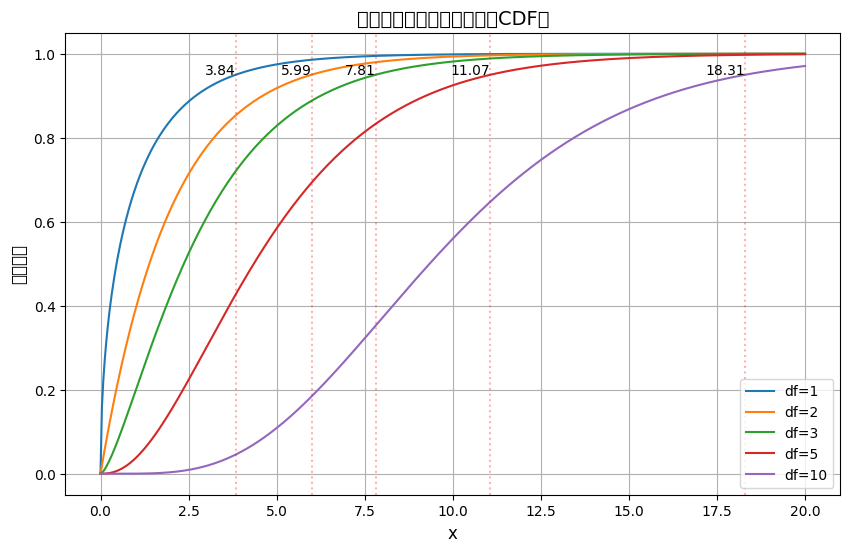

In [12]:
plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, chi2.cdf(x, df), label=f'df={df}')

# 标记95%分位数
for df in dfs:
    crit = chi2.ppf(0.95, df)
    plt.axvline(crit, color='r', linestyle=':', alpha=0.3)
    plt.text(crit, 0.95, f'{crit:.2f}', ha='right')

plt.title("卡方分布的累积分布函数（CDF）", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("累积概率", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

当alpha = 0.05时，自由度是10的chi^2分布的分位数是18.31，而q statistics是32，故有理由拒绝零假设H_o，认为在i属于{1,...,10}中，存在rho_i不等于0、

### White noise and linear time series

A time series rt is called a white noise if {rt} is a sequence of independent and identically distributed random variables with finite mean and variance. In particular, if rt is normally distributed with mean zero and variance σ2, the series is called a Gaussian white noise

### AR1 model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 参数设置
np.random.seed(42)  # 随机种子（可复现结果）
n = 500            # 时间序列长度
phi = 0.7          # 自回归系数（必须 |phi| < 1）
sigma = 1.0        # 噪声标准差

# 模拟 AR(1)
epsilon = np.random.normal(0, sigma, size=n)  # 白噪声
X = np.zeros(n)
for t in range(1, n):
    X[t] = phi * X[t-1] + epsilon[t]  # AR(1) 递推公式

# 转换为时间序列（可选）
import pandas as pd
dates = pd.date_range(start="2020-01-01", periods=n, freq="D")
ts = pd.Series(X, index=dates)

<>:3: DeprecationWarning: invalid escape sequence \p
<>:3: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_123166/2306292571.py:3: DeprecationWarning: invalid escape sequence \p
  plt.title(f"平稳 AR(1) 过程 ($\phi={phi}$)", fontsize=14)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35266 (\N{CJK UNIFIED IDEOGRAPH-89C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u5e73' [U+5e7

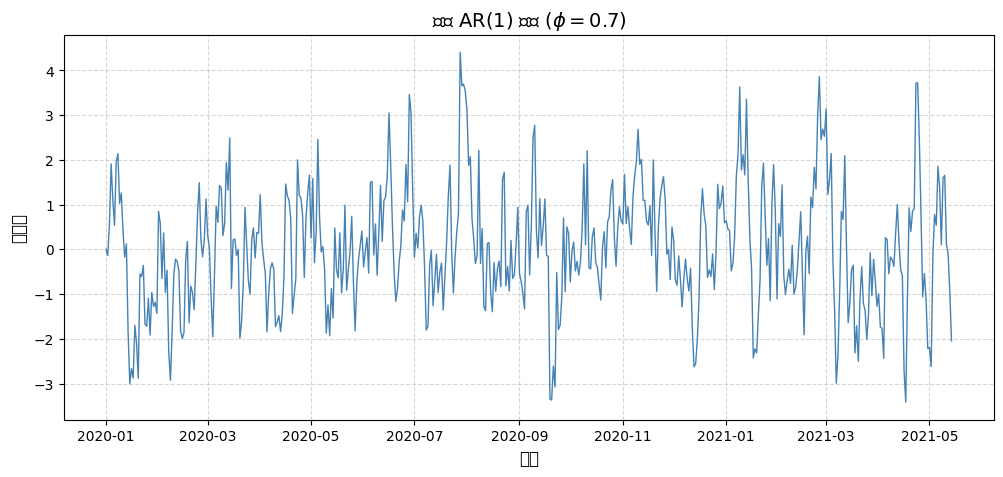

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(ts, linewidth=1, color='steelblue')
plt.title(f"平稳 AR(1) 过程 ($\phi={phi}$)", fontsize=14)
plt.xlabel("时间", fontsize=12)
plt.ylabel("观测值", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<>:3: DeprecationWarning: invalid escape sequence \p
<>:3: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_123166/3184382451.py:3: DeprecationWarning: invalid escape sequence \p
  plt.title(f"AR(1) 的自相关函数 ($\phi={phi}$)", fontsize=14)


<Figure size 1000x400 with 0 Axes>

/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPytho

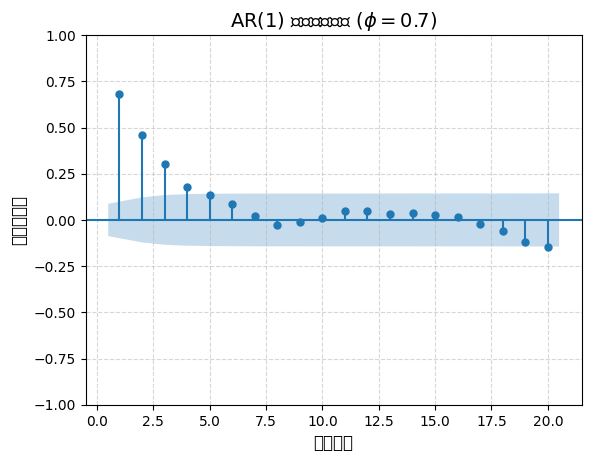

In [4]:
plt.figure(figsize=(10, 4))
plot_acf(ts, lags=20, alpha=0.05, zero=False)  # alpha 控制置信区间
plt.title(f"AR(1) 的自相关函数 ($\phi={phi}$)", fontsize=14)
plt.xlabel("滞后阶数", fontsize=12)
plt.ylabel("自相关系数", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Integration

<>:13: DeprecationWarning: invalid escape sequence \p
<>:20: DeprecationWarning: invalid escape sequence \p
<>:13: DeprecationWarning: invalid escape sequence \p
<>:20: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_123166/1991994697.py:13: DeprecationWarning: invalid escape sequence \p
  plt.title(f"AR(1) Process ($\phi={phi}$)", fontsize=14)
/tmp/ipykernel_123166/1991994697.py:20: DeprecationWarning: invalid escape sequence \p
  plt.title(f"ACF of AR(1) ($\phi={phi}$)", fontsize=14)


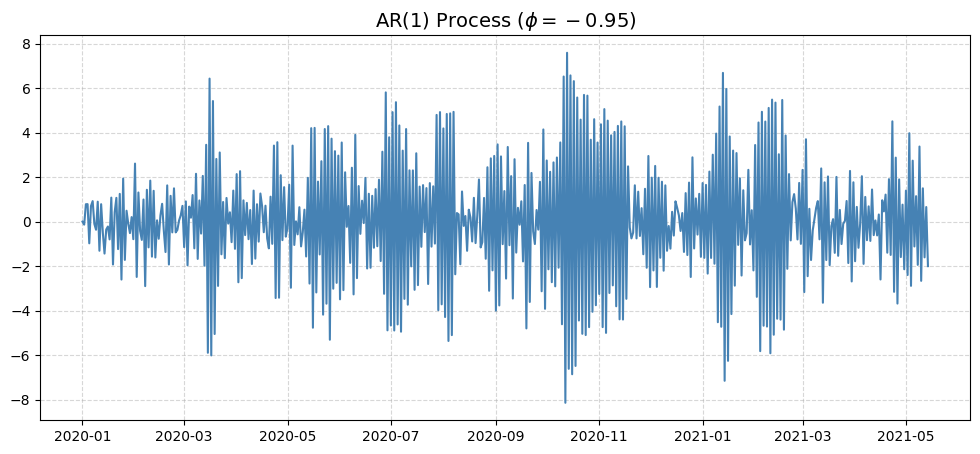

<Figure size 1000x400 with 0 Axes>

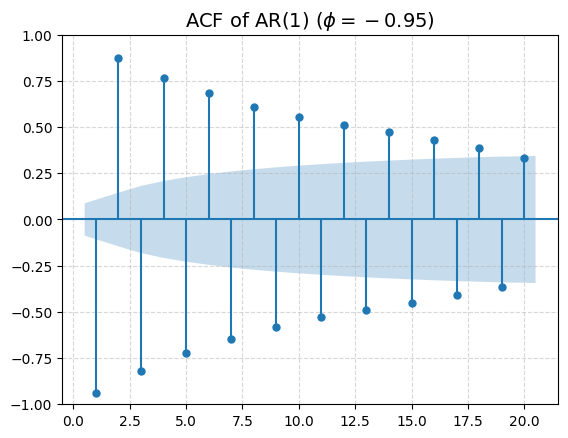

In [8]:
# 整合模拟 + 绘图
def simulate_ar1(phi=0.7, n=500, sigma=1.0):
    np.random.seed(42)
    epsilon = np.random.normal(0, sigma, n)
    X = np.zeros(n)
    for t in range(1, n):
        X[t] = phi * X[t-1] + epsilon[t]
    ts = pd.Series(X, index=pd.date_range("2020-01-01", periods=n, freq="D"))
    
    # 绘制时间序列
    plt.figure(figsize=(12, 5))
    plt.plot(ts, color='steelblue')
    plt.title(f"AR(1) Process ($\phi={phi}$)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # 绘制 ACF
    plt.figure(figsize=(10, 4))
    plot_acf(ts, lags=20, alpha=0.05, zero=False)
    plt.title(f"ACF of AR(1) ($\phi={phi}$)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# 示例调用
simulate_ar1(phi=-0.95)

<>:13: DeprecationWarning: invalid escape sequence \p
<>:20: DeprecationWarning: invalid escape sequence \p
<>:13: DeprecationWarning: invalid escape sequence \p
<>:20: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_123166/1057623416.py:13: DeprecationWarning: invalid escape sequence \p
  plt.title(f"AR(1) Process ($\phi={phi}$)", fontsize=14)
/tmp/ipykernel_123166/1057623416.py:20: DeprecationWarning: invalid escape sequence \p
  plt.title(f"ACF of AR(1) ($\phi={phi}$)", fontsize=14)


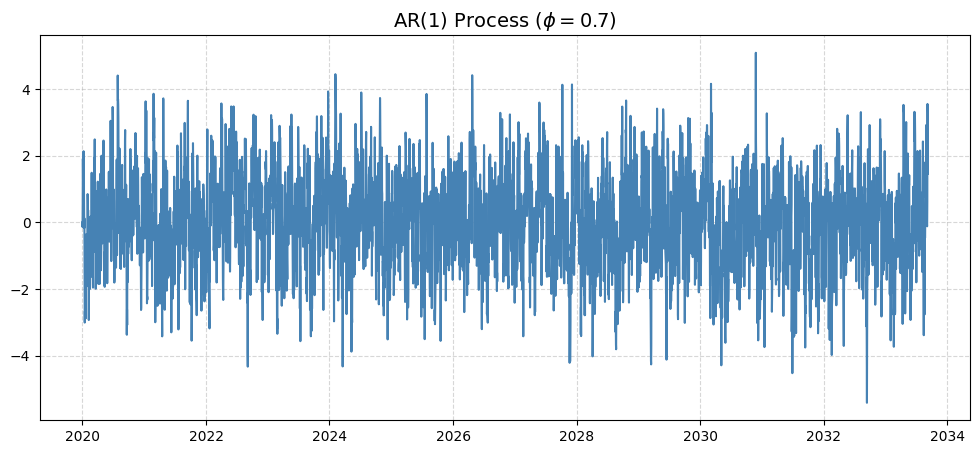

<Figure size 1000x400 with 0 Axes>

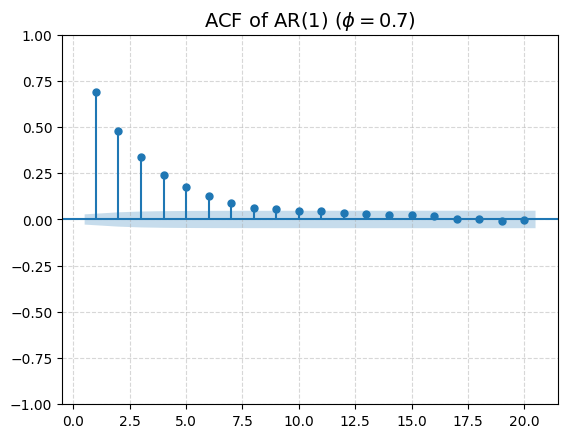

In [15]:
# 整合模拟 + 绘图
def simulate_ar1(phi=0.7, n=5000, sigma=1.0):
    np.random.seed(42)
    epsilon = np.random.normal(0, sigma, n)
    X = np.zeros(n)
    for t in range(1, n):
        X[t] = phi * X[t-1] + epsilon[t]
    ts = pd.Series(X, index=pd.date_range("2020-01-01", periods=n, freq="D"))
    
    # 绘制时间序列
    plt.figure(figsize=(12, 5))
    plt.plot(ts, color='steelblue')
    plt.title(f"AR(1) Process ($\phi={phi}$)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # 绘制 ACF
    plt.figure(figsize=(10, 4))
    plot_acf(ts, lags=20, alpha=0.05, zero=False)
    plt.title(f"ACF of AR(1) ($\phi={phi}$)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# 示例调用
simulate_ar1(phi=0.7)

注意到，当phi的绝对值比较小时，如0.7，ACF并不完全呈指数下降，而是在lag值较大时呈现振荡的形式，这是由于图中的ACF是样本ACF，其与真实值将有所不同。蓝色带是置信水平位alpha的带，可以根据其范围确定样本ACF值是否可信。而增加样本数n，也能提高样本ACF的可信度。

或者说，超过蓝色带，可以说在0.05的显著度下，说明该ACF不为0

### AR2 model

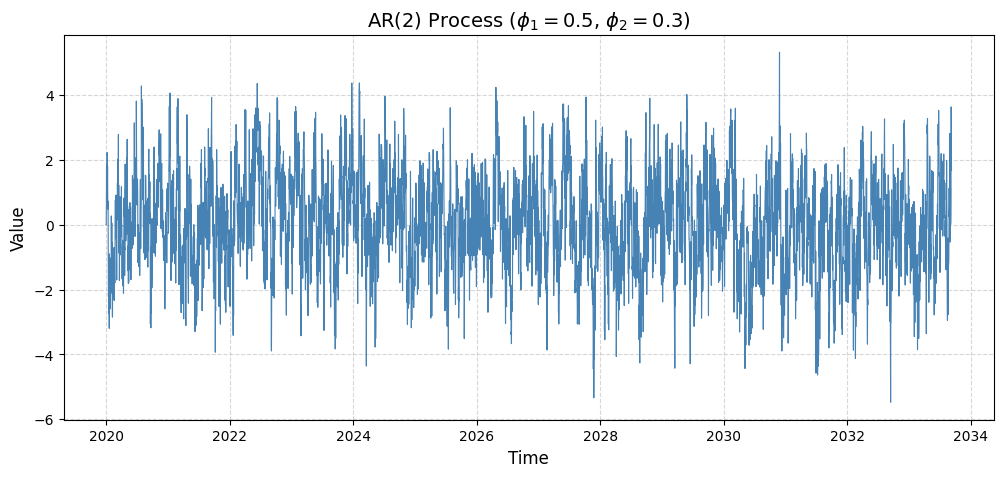

<Figure size 1000x400 with 0 Axes>

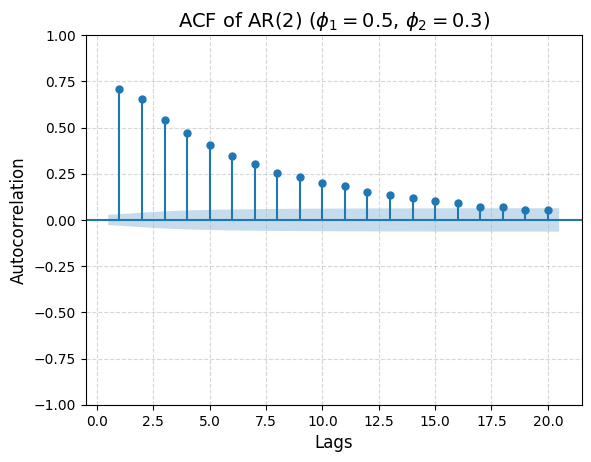

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

def simulate_ar2(phi1=0.5, phi2=0.3, n=5000, sigma=1.0):
    """
    模拟平稳 AR(2) 过程并绘图
    :param phi1: 滞后1阶自回归系数
    :param phi2: 滞后2阶自回归系数
    :param n: 时间序列长度
    :param sigma: 噪声标准差
    """
    # 检查平稳性条件（可选）
    # 特征方程根需在单位圆外：1 - phi1*z - phi2*z^2 = 0 的根 |z| > 1
    # 此处未实现，需用户自行确保参数平稳
    
    np.random.seed(42)
    epsilon = np.random.normal(0, sigma, n)
    X = np.zeros(n)
    
    # AR(2) 递推公式
    for t in range(2, n):
        X[t] = phi1 * X[t-1] + phi2 * X[t-2] + epsilon[t]
    
    ts = pd.Series(X, index=pd.date_range("2020-01-01", periods=n, freq="D"))
    
    # 绘制时间序列
    plt.figure(figsize=(12, 5))
    plt.plot(ts, color='steelblue', linewidth=0.8)
    plt.title(f"AR(2) Process ($\phi_1={phi1}$, $\phi_2={phi2}$)", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # 绘制ACF
    plt.figure(figsize=(10, 4))
    plot_acf(ts, lags=20, alpha=0.05, zero=False)
    plt.title(f"ACF of AR(2) ($\phi_1={phi1}$, $\phi_2={phi2}$)", fontsize=14)
    plt.xlabel("Lags", fontsize=12)
    plt.ylabel("Autocorrelation", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# 示例调用（满足平稳性的参数组合）
simulate_ar2(phi1=0.5, phi2=0.3)  # 平稳参数
# simulate_ar2(phi1=1.2, phi2=-0.7)  # 非平稳参数（ACF会出现长期记忆性）

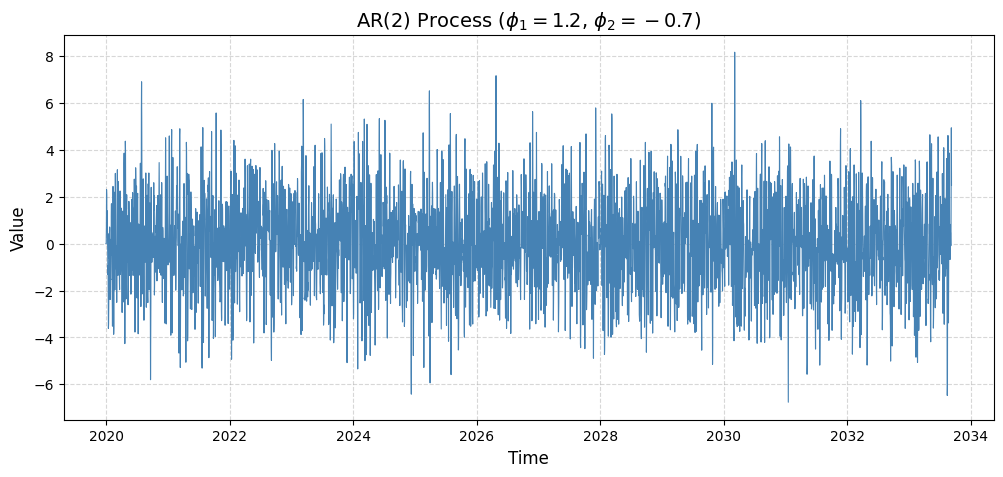

<Figure size 1000x400 with 0 Axes>

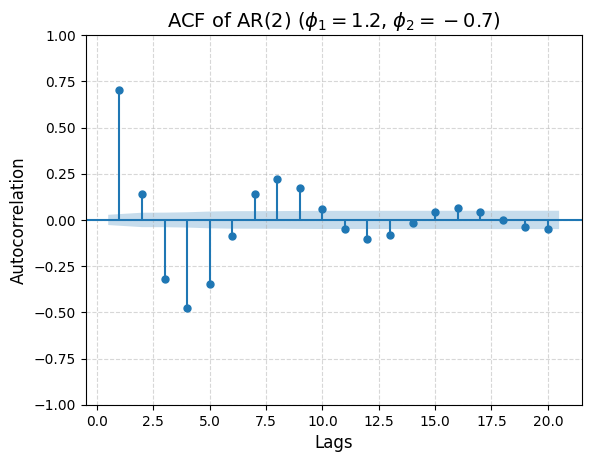

In [2]:
# 示例调用（满足平稳性的参数组合）
# simulate_ar2(phi1=0.5, phi2=0.3)  # 平稳参数
simulate_ar2(phi1=1.2, phi2=-0.7)  # 非平稳参数（ACF会出现长期记忆性）

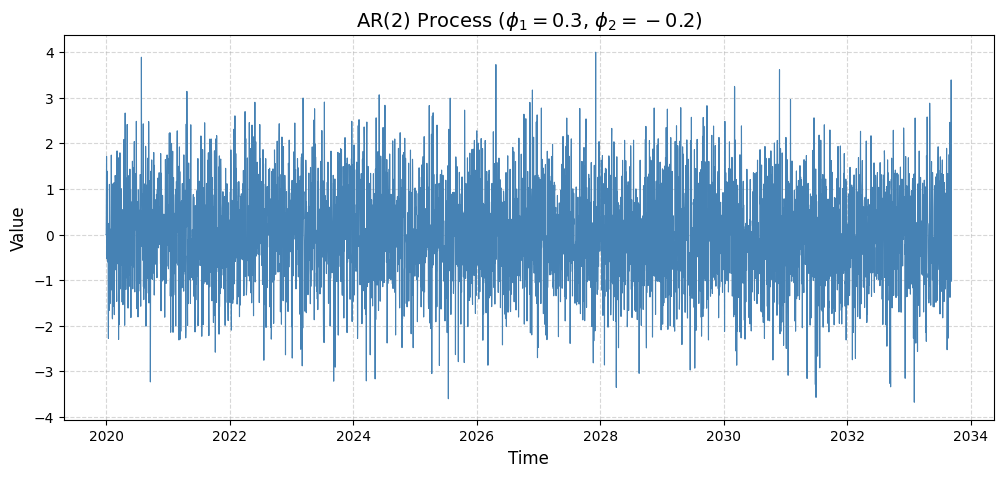

<Figure size 1000x400 with 0 Axes>

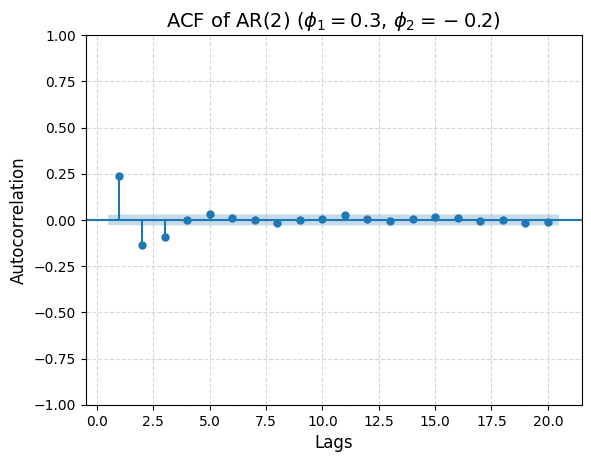

In [3]:
# 示例调用（满足平稳性的参数组合）
# simulate_ar2(phi1=0.5, phi2=0.3)  # 平稳参数
simulate_ar2(phi1=0.3, phi2=-0.2)  # 非平稳参数（ACF会出现长期记忆性）

In [4]:
def check_ar2_stationary(phi1, phi2):
    """检查AR(2)的平稳性条件"""
    # 特征方程：1 - phi1*z - phi2*z^2 = 0
    roots = np.roots([1, -phi1, -phi2])
    modulus = np.abs(roots)
    is_stationary = np.all(modulus > 1)
    print(f"特征根: {roots}, 模长: {modulus}, 是否平稳: {is_stationary}")
    return is_stationary

# 示例检查
check_ar2_stationary(phi1=0.5, phi2=0.3)  # 输出 True
check_ar2_stationary(phi1=1.2, phi2=-0.5) # 输出 False

特征根: [ 0.85207973 -0.35207973], 模长: [0.85207973 0.35207973], 是否平稳: False
特征根: [0.6+0.37416574j 0.6-0.37416574j], 模长: [0.70710678 0.70710678], 是否平稳: False


np.False_

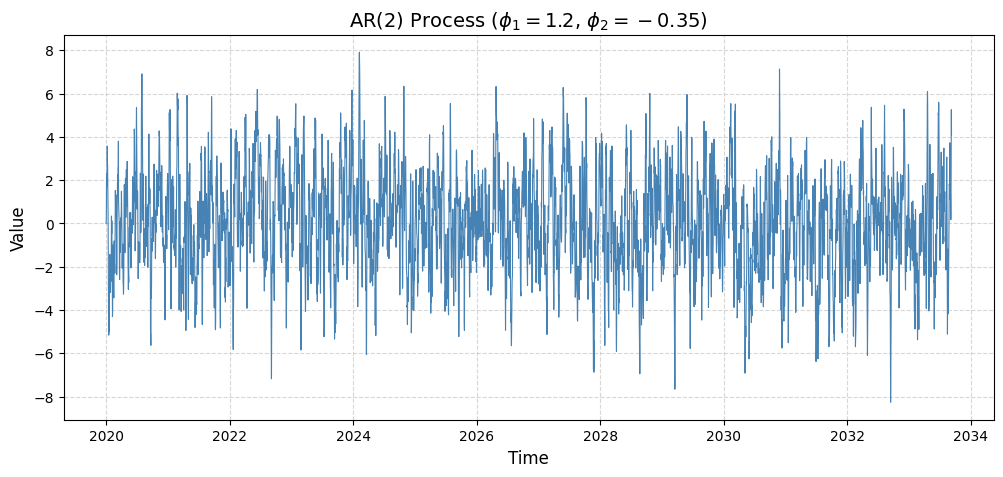

<Figure size 1000x400 with 0 Axes>

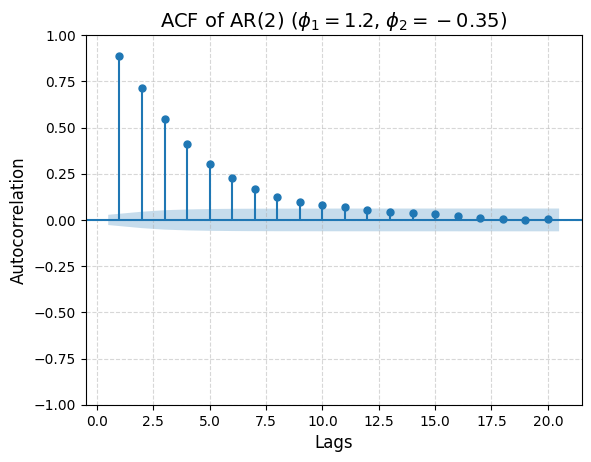

In [5]:
simulate_ar2(phi1=1.2, phi2=-0.35)  # 非平稳参数（ACF会出现长期记忆性）

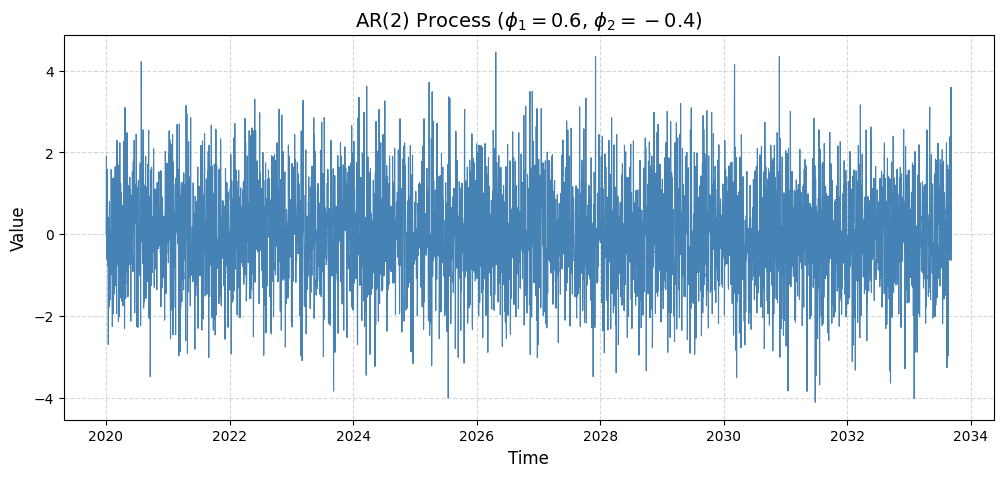

<Figure size 1000x400 with 0 Axes>

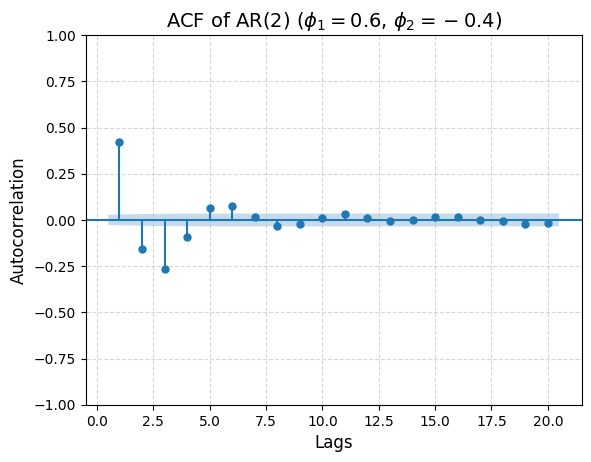

In [6]:
simulate_ar2(phi1=0.6, phi2=-0.4)  # 非平稳参数（ACF会出现长期记忆性）

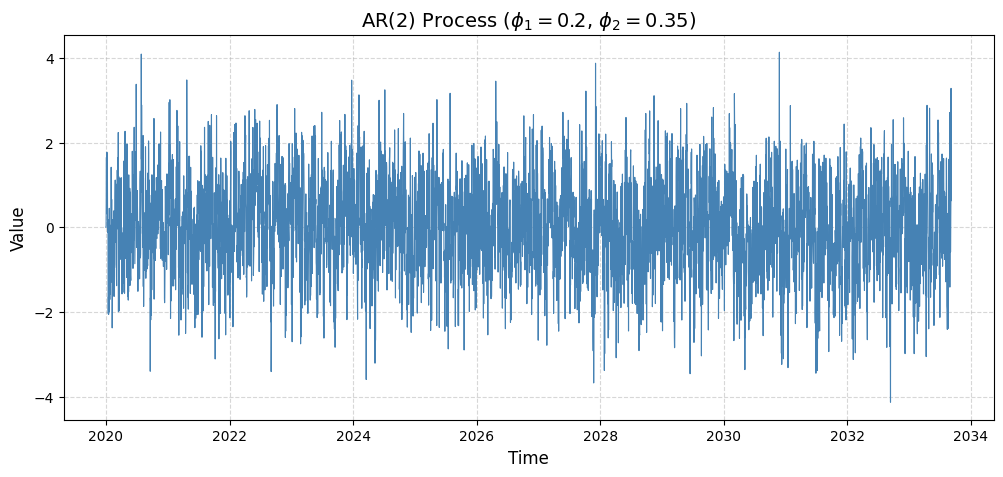

<Figure size 1000x400 with 0 Axes>

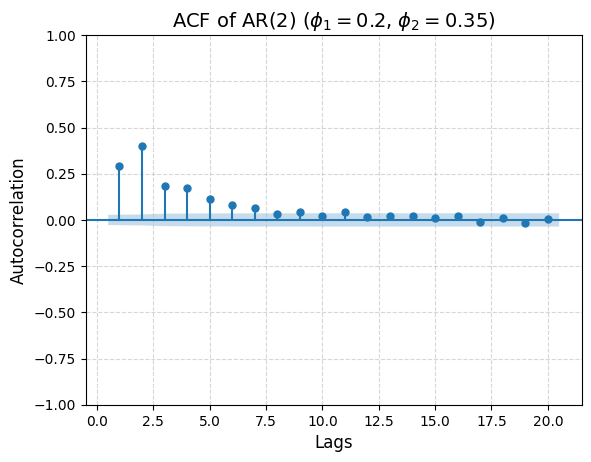

In [7]:
simulate_ar2(phi1=0.2, phi2=0.35)  # 非平稳参数（ACF会出现长期记忆性）

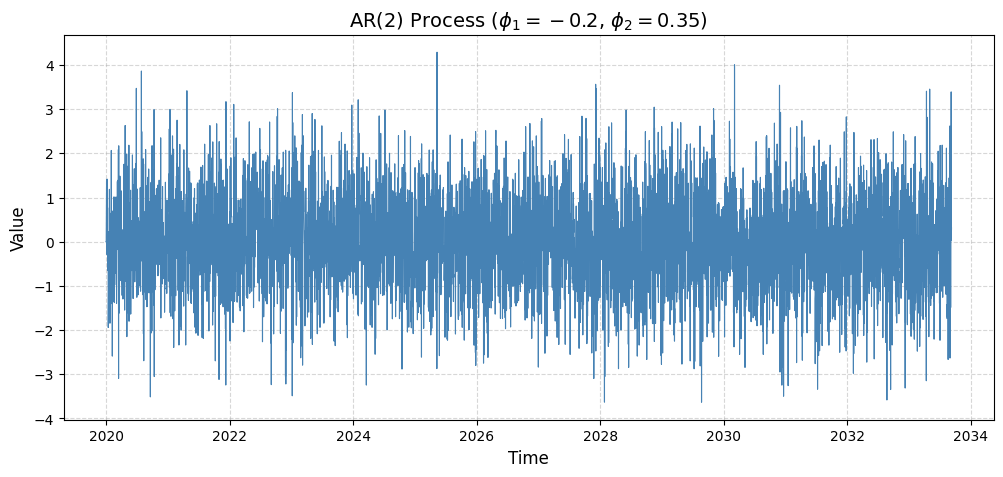

<Figure size 1000x400 with 0 Axes>

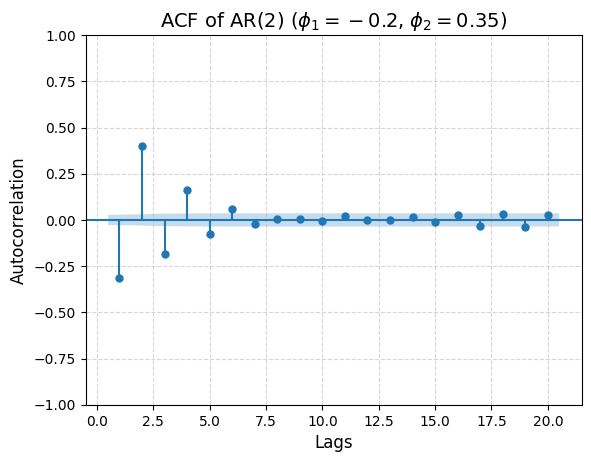

In [8]:
simulate_ar2(phi1=-0.2, phi2=0.35)  # 非平稳参数（ACF会出现长期记忆性）

### Fit the data to AR2 model

用AR2模型去拟合已有的收益率数据，并对未来的波动率进行预测

In [3]:
# returns = filtered_df["涨跌幅"]
returns = pd.Series(filtered_df["涨跌幅"].values, index=pd.to_datetime(filtered_df['日期']))

In [4]:
returns

日期
2010-01-04   -5.06
2010-01-05    1.78
2010-01-06   -4.49
2010-01-07   -4.96
2010-01-08    2.47
              ... 
2024-12-25    2.17
2024-12-26   -0.10
2024-12-27    0.19
2024-12-30    1.06
2024-12-31   -1.72
Length: 3596, dtype: float64

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


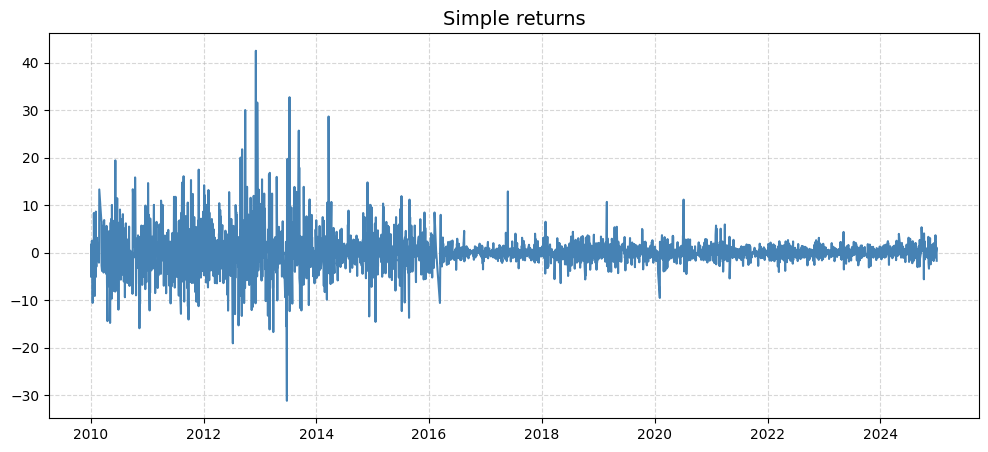

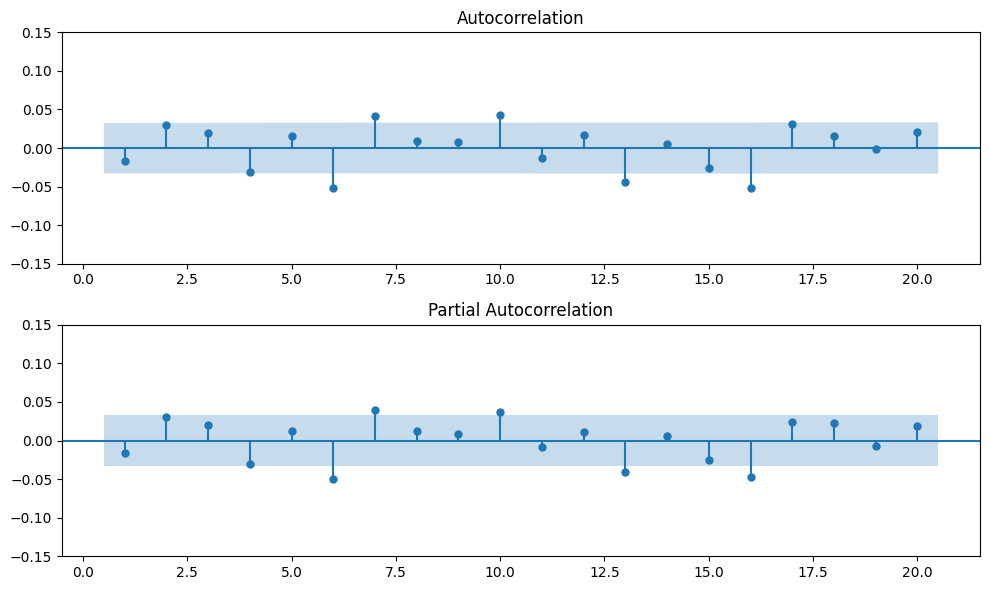

In [6]:
# 绘制收益率序列
plt.figure(figsize=(12, 5))
plt.plot(returns, color='steelblue')
plt.title('Simple returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ACF/PACF分析
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(returns, lags=20, ax=ax1, zero=False)
plot_pacf(returns, lags=20, ax=ax2, method='ywm', zero=False)  # Yule-Walker修正方法
ax1.set_ylim(-0.15, 0.15)  # 设置y轴范围
ax2.set_ylim(-0.15, 0.15)  # 设置y轴范围
plt.tight_layout()
plt.show()

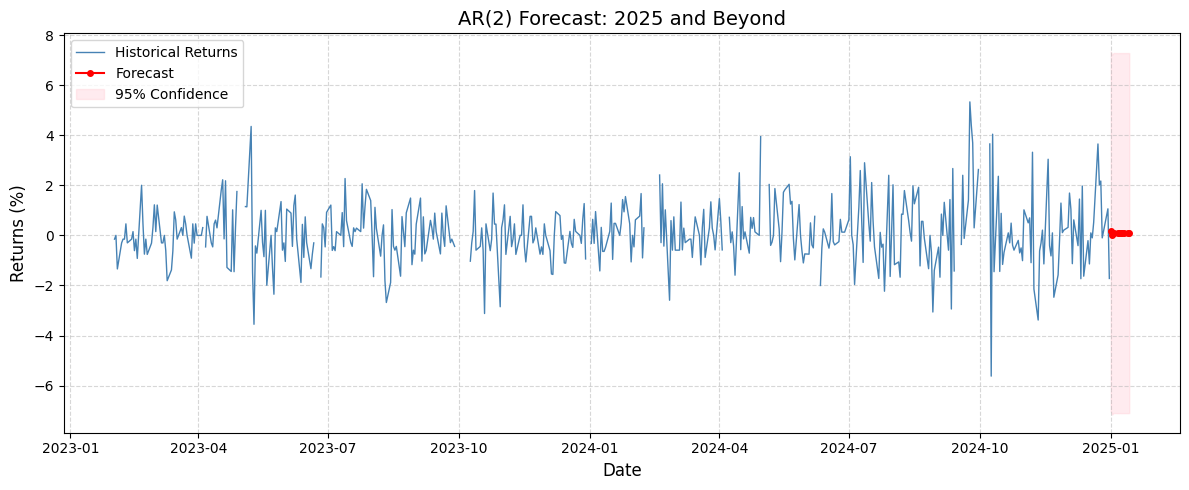

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import BDay

# 假设 returns 是带日期索引的Series（已解决索引问题）


# --- 步骤1：设置频率 ---
returns = returns.asfreq('B')  # 确保索引为工作日

# --- 步骤2：拟合模型 ---
model = ARIMA(returns, order=(2, 0, 0))
results = model.fit()

# --- 步骤3：生成未来日期 ---
last_date = returns.index[-1]
future_dates = pd.date_range(
    start=last_date + BDay(1),
    periods=10,
    freq='B'
)

# 预测并替换索引
forecast = results.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean.index = future_dates
forecast_ci.index = future_dates

# --- 步骤4：绘图 ---
plt.figure(figsize=(12, 5))
plt.plot(returns[-500:], label='Historical Returns', linewidth=1, color='steelblue')
plt.plot(forecast_mean, 'ro-', markersize=4, label='Forecast')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence'
)
plt.title('AR(2) Forecast: 2025 and Beyond', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
print(results.summary())  # 检查const和ar.L1、ar.L2系数

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3912
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9773.401
Date:                Sat, 12 Apr 2025   AIC                          19554.801
Time:                        20:40:33   BIC                          19579.888
Sample:                    01-04-2010   HQIC                         19563.704
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0917      0.066      1.392      0.164      -0.037       0.221
ar.L1         -0.0194      0.009     -2.075      0.038      -0.038      -0.001
ar.L2          0.0333      0.008      4.136      0.0

In [9]:
# 拟合AR(2)模型
model = ARIMA(returns, order=(2, 0, 0))
results = model.fit()
residuals = results.resid

# 获取AR(2)系数
phi1, phi2 = results.arparams
forecast_steps = 5

# 方法1：使用脉冲响应函数
def get_psi_k(phi1, phi2, h):
    psi = np.zeros(h)
    psi[0] = 1
    if h >= 2:
        psi[1] = phi1 * psi[0]
    for k in range(2, h):
        psi[k] = phi1 * psi[k-1] + phi2 * psi[k-2]
    return psi

psi = get_psi_k(phi1, phi2, forecast_steps)
conditional_volatility = np.std(residuals) * np.sqrt(1 + sum(psi[1:forecast_steps]**2))

# 方法2：AR(2)解析解（验证结果是否一致）
variance_ratio = 1 + (phi1**2 + phi2**2) * (forecast_steps - 1)
conditional_volatility_alt = np.std(residuals) * np.sqrt(variance_ratio)

print(f"方法1结果: {conditional_volatility:.2f}%")
print(f"方法2结果: {conditional_volatility_alt:.2f}%")

方法1结果: 3.67%
方法2结果: 3.68%


检查OS部分的实际波动率，以标准差记。

In [9]:
returns_OS = df[(df['日期'] > '2025-01-01') & (df['日期'] < '2025-04-10')]["涨跌幅"]
print(f"波动率：{np.std(returns_OS)}")

波动率：1.6877573187350765


可以看到预测的收益率分布明显小于历史收益率，这可能由于:
1. 模型的均值回归特性，AR2模型的长期预测值会收敛到其理论均值 $\mu = \frac{C}{1 - \phi_{1} - \phi_{2}}$。如果常数项C接近0，且$\phi_{1} + \phi_{2} < 1$（平稳条件），预测值会逐渐衰减至0，这与results.summary()给出的结果相符合：const = 0.0917，接近0，且由于其标准差等于0.066，故不显著，而ar.L1 + ar.L2明显小于1，则预测会快速衰减。本质是AR2模型适合对于具有良好的自相关性的序列进行预测，而这里提供的序列其实并不存在这样的自相关性。
2. 当股票收益率存在“波动率聚类”（高波动后跟随高波动）现象时，但AR2仅建模均值，未考虑波动率时变。也就是说该模型是假设波动率不变的。当历史数据包含高波动期，简单AR模型会低估未来的波动，导致预测区间过窄。可以改用ARMA-GARCH模型进行建模
3. 结构突变未被捕获。若历史数据中包含不同制度（如牛市、熊市的切换），AR2的固定参数无法适应这种变化。模型参数反映的是整体样本的平均关系，可能低估近期趋势
4. 

### 下面我们建模一个能用AR2模型良好描述的模型和数据

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -699.634
Date:                Sat, 12 Apr 2025   AIC                           1407.267
Time:                        20:55:32   BIC                           1424.126
Sample:                    01-01-2020   HQIC                          1413.882
                         - 05-14-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0652      0.357      0.182      0.855      -0.635       0.765
ar.L1          0.5953      0.044     13.515      0.000       0.509       0.682
ar.L2          0.2804      0.045      6.262      0.0

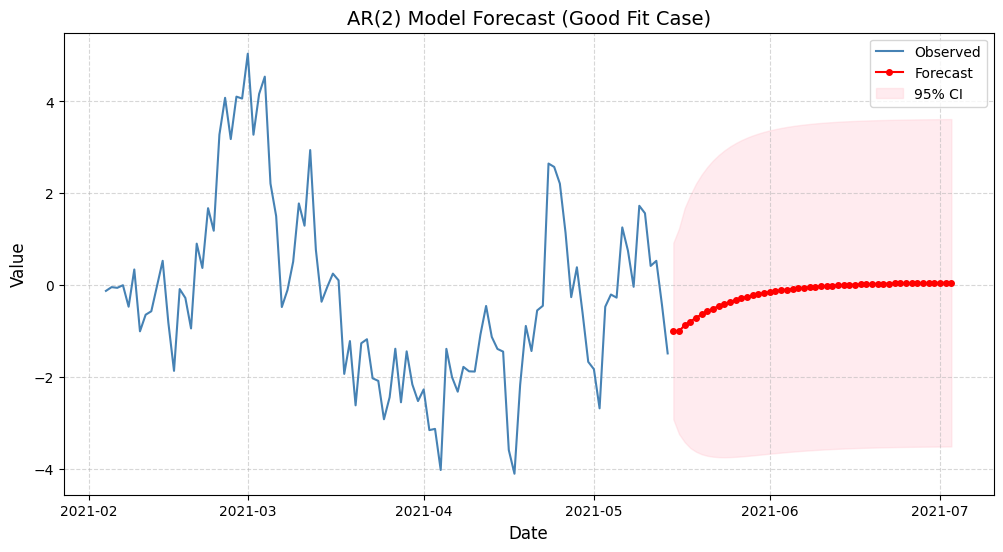

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 生成AR(2)数据（phi1=0.6, phi2=0.3）
np.random.seed(42)
n = 500
epsilon = np.random.normal(0, 1, n)
X = np.zeros(n)
for t in range(2, n):
    X[t] = 0.6 * X[t-1] + 0.3 * X[t-2] + epsilon[t]  # 真实AR(2)过程

# 转换为时间序列（假设为日数据）
dates = pd.date_range(start="2020-01-01", periods=n, freq="D")
ts = pd.Series(X, index=dates)
ts = ts.asfreq("D")  # 明确设置频率

# 拟合AR(2)模型
model = ARIMA(ts, order=(2, 0, 0))
results = model.fit()
print(results.summary())

# 预测未来50天
forecast_steps = 50
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 生成未来日期
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(ts[-100:], label="Observed", color="steelblue")  # 展示最近100天数据
plt.plot(future_dates, forecast_mean, "ro-", markersize=4, label="Forecast")
plt.fill_between(
    future_dates,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="pink",
    alpha=0.3,
    label="95% CI",
)
plt.title("AR(2) Model Forecast (Good Fit Case)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

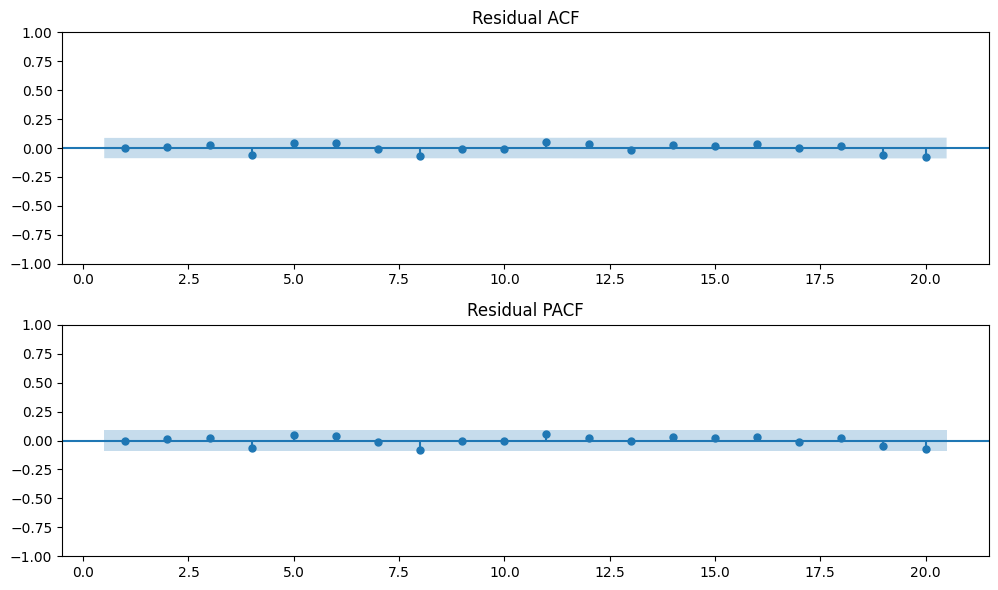

In [11]:
# 残差检验
residuals = results.resid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(residuals, lags=20, ax=ax1, title="Residual ACF", zero=False)
plot_pacf(residuals, lags=20, ax=ax2, method="ywm", title="Residual PACF", zero=False)
plt.tight_layout()
plt.show()

### 尝试用ARCH模拟一些数据

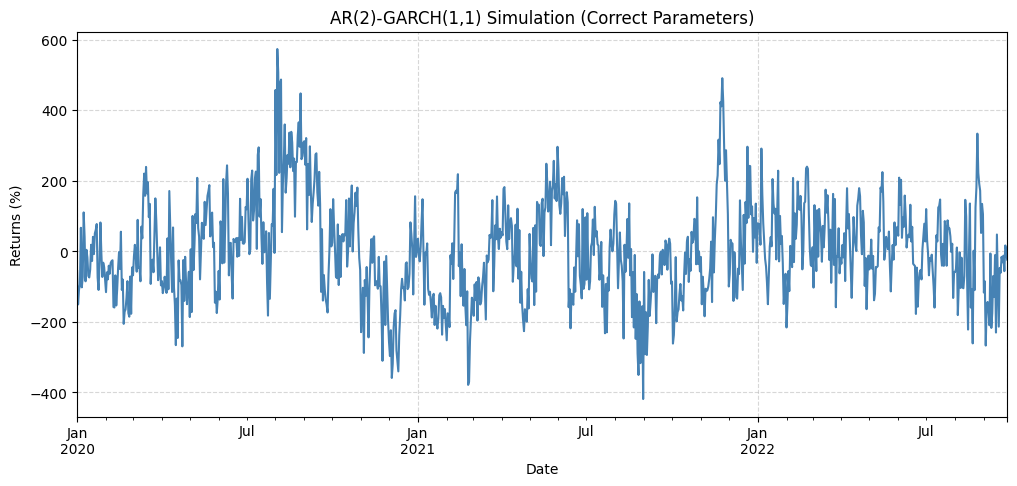

In [12]:
from arch import arch_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 正确初始化模型
am = arch_model(
    None,                # 无输入数据，纯模拟
    mean="AR",           # 使用AR均值模型
    lags=2,              # AR(2)阶数
    vol="GARCH",         # 使用GARCH波动率模型
    p=1, q=1,            # GARCH(1,1)
    dist="normal"
)

# 2. 手动指定参数顺序（重要！）
# 参数顺序为: [mu, ar.L1, ar.L2, omega, alpha[1], beta[1]]
params = np.array([0.0,   # mu (常数项)
                  0.5,    # ar.L1 (AR1系数)
                  0.3,    # ar.L2 (AR2系数)
                  0.1,    # omega (GARCH常数项)
                  0.1,    # alpha[1] (ARCH项)
                  0.8])   # beta[1] (GARCH项)

# 3. 模拟数据
sim_data = am.simulate(
    params=params,      # 直接传入NumPy数组
    nobs=1000,          # 生成1000个数据点
    burn=500            # 丢弃前500个预热点
)

# 4. 转换为时间序列并绘图
ts = pd.Series(
    sim_data.data.values * 100,  # 转换为百分比收益率
    index=pd.date_range("2020-01-01", periods=1000)
)

ts.plot(figsize=(12, 5), 
       title="AR(2)-GARCH(1,1) Simulation (Correct Parameters)",
       color="steelblue")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()